#### Problem Description 
- Following the Final Projext study of Master Degree 
  we will tackal the problem of Segementation Left Atrial uisng deep learning 
#### Task :
  * **Virtuialization**

In [2]:
# import packages 
%matplotlib inline
### Processing data 
from celluloid import Camera
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np 
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
import nibabel as nib
from pathlib import Path
import os 
import pandas as pd 

In [4]:
## we will need to assing img to corrsponding label 
root_img = Path("../input/heart-mri-image-dataset-left-atrial-segmentation/imagesTr")
root_lab = Path("../input/heart-mri-image-dataset-left-atrial-segmentation/labelsTr")
# creat function 
lenght_img = 19
def image_to_label(sample: int ,path_img: str, path_lab: str):
    if sample <= lenght_img:
        image_index = list(os.listdir(path_img))
        label_index = list(filter(("._la_029.nii.gz").__ne__,os.listdir(path_lab)))
        image_index.remove("._la_029.nii.gz")
        label_index.remove('._la_014.nii.gz')
        list_img = image_index[sample]
        list_lab = label_index[sample]
        for (img_idx , lab_idx) in zip(list_img,list_lab):
            if img_idx == lab_idx:  
                path_img = os.path.join(root_img,list_img)
                path_lab = os.path.join(root_lab,list_lab)
            else: 
                print("the path doesn't exist")

        return Path(path_img) , Path(path_lab)  
    else:
        raise Exception("out of range index list images")
        

img , lab = image_to_label(1,root_img,root_lab)   
print(f"path image :{img}\npath label : {lab}")
print(f"number sample of img :{lenght_img}")

path image :../input/heart-mri-image-dataset-left-atrial-segmentation/imagesTr/la_010.nii
path label : ../input/heart-mri-image-dataset-left-atrial-segmentation/labelsTr/la_010.nii
number sample of img :19


In [5]:
### loading sample img , lab 
image = nib.load(img)
label = nib.load(lab)
nib_img = image.get_fdata()
nib_lab = label.get_fdata().astype(np.uint8)
voxel_img =nib.aff2axcodes(image.affine)
voxel_lab =nib.aff2axcodes(label.affine)
print(f"Corredinats image :{voxel_img}\ndata type array image {nib_img.dtype}")
print(f"Corredinats label :{voxel_lab}\ndata type array label {nib_lab.dtype}")

Corredinats image :('R', 'A', 'S')
data type array image float64
Corredinats label :('R', 'A', 'S')
data type array label uint8


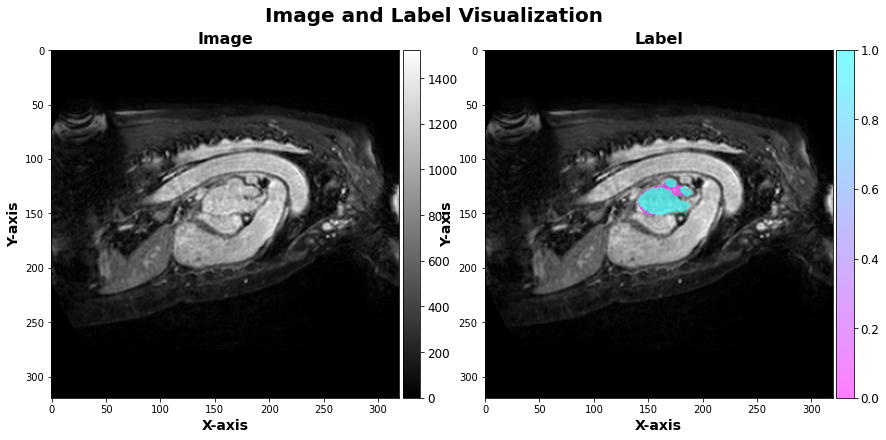

In [4]:
# Create a figure and axis objects
fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# Show the image
im = axs[0].imshow(nib_img[:, :, 54], cmap='gray')
axs[0].set_title('Image', fontsize=16, fontweight='bold')
axs[0].set_xlabel('X-axis', fontsize=14, fontweight='bold')
axs[0].set_ylabel('Y-axis', fontsize=14, fontweight='bold')
divider = make_axes_locatable(axs[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=12)

# Show the label
mask = np.ma.masked_where(nib_lab[:, :, 54]==0, nib_lab[:, :, 50])
im = axs[1].imshow(nib_img[:, :, 54], cmap='gray')
im = axs[1].imshow(mask, alpha=0.5, cmap='cool_r')
axs[1].set_title('Label', fontsize=16, fontweight='bold')
axs[1].set_xlabel('X-axis', fontsize=14, fontweight='bold')
axs[1].set_ylabel('Y-axis', fontsize=14, fontweight='bold')
divider = make_axes_locatable(axs[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=12)

# Add a main title to the figure
fig.suptitle('Image and Label Visualization', fontsize=20, fontweight='bold')

# Save the figure and show it
plt.savefig('./Figures/image_and_label_visualization_overlay.png', dpi=300)
plt.show()

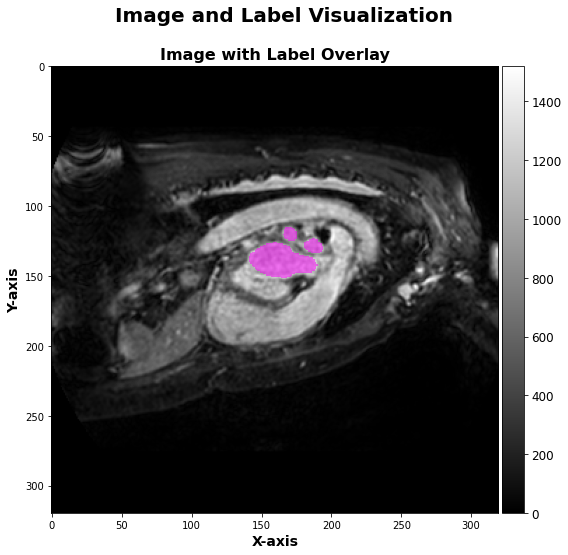

In [5]:
# Create a figure and axis objects
fig, axs = plt.subplots(1, 1, figsize=(8, 8))

# Show the image
im = axs.imshow(nib_img[:, :, 50], cmap='gray')
axs.set_title('Image with Label Overlay', fontsize=16, fontweight='bold')
axs.set_xlabel('X-axis', fontsize=14, fontweight='bold')
axs.set_ylabel('Y-axis', fontsize=14, fontweight='bold')

# Overlay the label
mask = np.ma.masked_where(nib_lab[:, :, 50] == 0, nib_lab[:, :, 100])
axs.imshow(mask, alpha=0.5, cmap='cool_r')
# Add a colorbar
divider = make_axes_locatable(axs)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=12)
# Add a main title to the figure
fig.suptitle('Image and Label Visualization', fontsize=20, fontweight='bold')

# Adjust spacing between plots and show the figure
plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.savefig('./Figures/image_and_label_visualization_single_overlay.png', dpi=300)
plt.show()

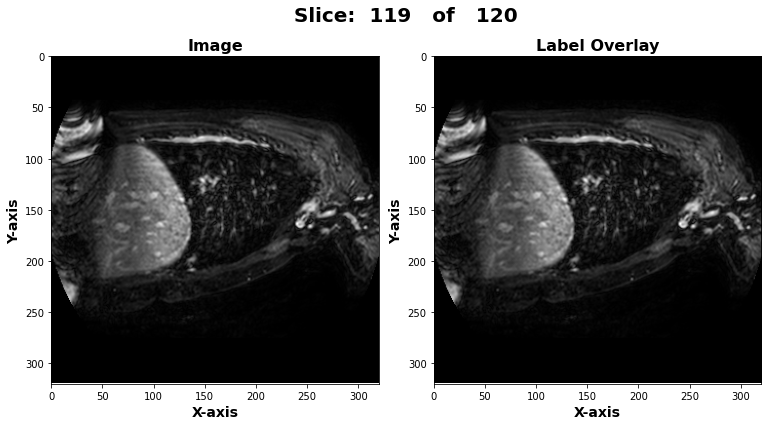

In [10]:
# Set up a loop to generate frames for the animation
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
def update(i):
    axs[0].clear()
    axs[0].imshow(nib_img[:, :, i], cmap='gray')
    axs[0].set_title('Image', fontsize=16, fontweight='bold')
    axs[0].set_xlabel('X-axis', fontsize=14, fontweight='bold')
    axs[0].set_ylabel('Y-axis', fontsize=14, fontweight='bold')
    axs[0].set_xlim([0, nib_img.shape[1]])
    axs[0].set_ylim([nib_img.shape[0], 0])

    axs[1].clear()
    axs[1].imshow(nib_img[:, :, i], cmap='gray')
    axs[1].imshow(np.ma.masked_where(nib_lab[:, :, i]==0, nib_lab[:, :, i]), cmap='cool_r', alpha=0.5)
    axs[1].set_title('Label Overlay', fontsize=16, fontweight='bold')
    axs[1].set_xlabel('X-axis', fontsize=14, fontweight='bold')
    axs[1].set_ylabel('Y-axis', fontsize=14, fontweight='bold')
    axs[1].set_xlim([0, nib_img.shape[1]])
    axs[1].set_ylim([nib_img.shape[0], 0])

    fig.suptitle('Slice:  {:03d}   of   {}'.format(i, nib_img.shape[2]), fontsize=20, fontweight='bold')

    plt.tight_layout()

# Generate the animation using FuncAnimation
ani = FuncAnimation(fig, update, frames=nib_img.shape[2], interval=50)

# Save the animation as a gif file
ani.save('./Figures/image_label_overlay_ex2.gif', writer='imagemagick')

# Display the animation
plt.show()

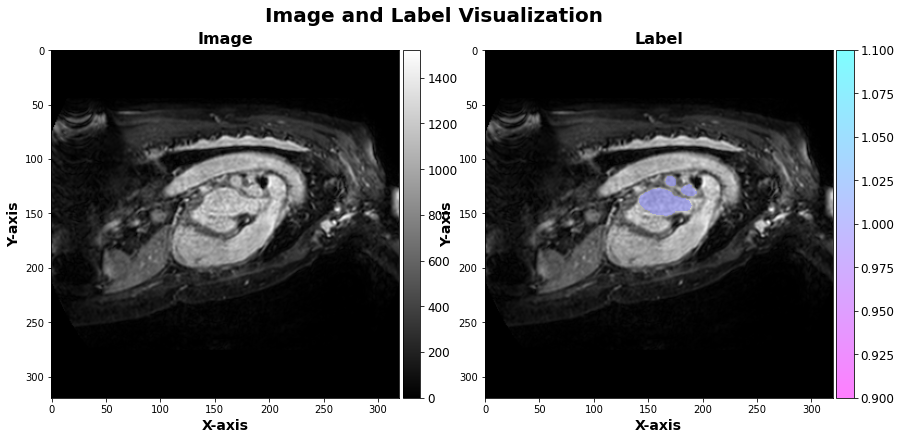

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Create a figure and axis objects
fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# Show the image
im = axs[0].imshow(nib_img[:, :, 50], cmap='gray')
axs[0].set_title('Image', fontsize=16, fontweight='bold')
axs[0].set_xlabel('X-axis', fontsize=14, fontweight='bold')
axs[0].set_ylabel('Y-axis', fontsize=14, fontweight='bold')
divider = make_axes_locatable(axs[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=12)

# Show the label
mask = np.ma.masked_where(nib_lab[:, :, 50]==0, nib_lab[:, :, 50])
im = axs[1].imshow(nib_img[:, :, 50], cmap='gray')
im = axs[1].imshow(mask, alpha=0.5, cmap='cool_r')
axs[1].set_title('Label', fontsize=16, fontweight='bold')
axs[1].set_xlabel('X-axis', fontsize=14, fontweight='bold')
axs[1].set_ylabel('Y-axis', fontsize=14, fontweight='bold')
divider = make_axes_locatable(axs[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=12)

# Add a main title to the figure
fig.suptitle('Image and Label Visualization', fontsize=20, fontweight='bold')

# Save the figure and show it
plt.savefig('./Figures/image_and_label_visualization.png', dpi=300)
plt.show()


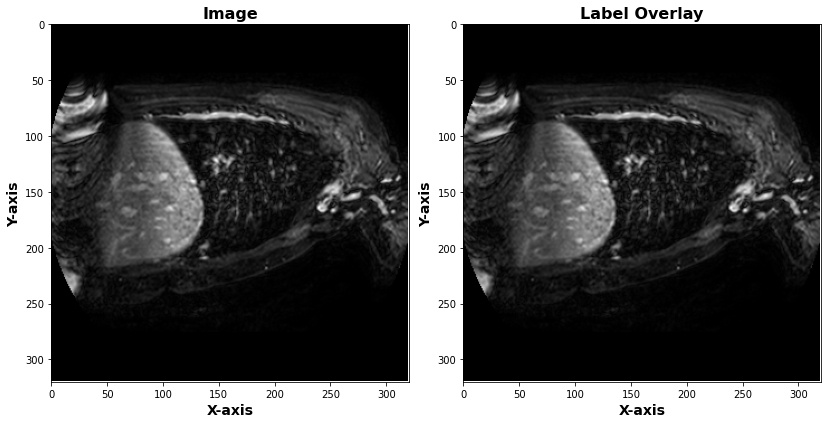

In [15]:
# Create a figure and axis objects
from matplotlib.animation import FuncAnimation
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Set up a loop to generate frames for the animation
def update(frame):
    axs[0].clear()
    axs[0].imshow(nib_img[:, :, frame], cmap='gray')
    axs[0].set_title('Image', fontsize=16, fontweight='bold')
    axs[0].set_xlabel('X-axis', fontsize=14, fontweight='bold')
    axs[0].set_ylabel('Y-axis', fontsize=14, fontweight='bold')
    axs[0].set_xlim([0, nib_img.shape[1]])
    axs[0].set_ylim([nib_img.shape[0], 0])

    axs[1].clear()
    axs[1].imshow(nib_img[:, :, frame], cmap='gray')
    axs[1].imshow(np.ma.masked_where(nib_lab[:, :, frame]==0, nib_lab[:, :, frame]), cmap='cool_r', alpha=0.5)
    axs[1].set_title('Label Overlay', fontsize=16, fontweight='bold')
    axs[1].set_xlabel('X-axis', fontsize=14, fontweight='bold')
    axs[1].set_ylabel('Y-axis', fontsize=14, fontweight='bold')
    axs[1].set_xlim([0, nib_img.shape[1]])
    axs[1].set_ylim([nib_img.shape[0], 0])

    plt.tight_layout()

# Generate the animation using FuncAnimation
ani = FuncAnimation(fig, update, frames=nib_img.shape[2], interval=50)

# Save the animation as a gif file
ani.save('./Figures/image_label_overlay.gif', writer='imagemagick')

# Display the animation
plt.show()


In [ ]:
# Create a figure and axis objects
from matplotlib.animation import FuncAnimation
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Set up a loop to generate frames for the animation
def update(i):
    axs[0].clear()
    axs[0].imshow(nib_img[:, :, i], cmap='gray')
    axs[0].set_title('Image', fontsize=16, fontweight='bold')
    axs[0].set_xlabel('X-axis', fontsize=14, fontweight='bold')
    axs[0].set_ylabel('Y-axis', fontsize=14, fontweight='bold')
    axs[0].set_xlim([0, nib_img.shape[1]])
    axs[0].set_ylim([nib_img.shape[0], 0])

    axs[1].clear()
    axs[1].imshow(nib_img[:, :, i], cmap='gray')
    axs[1].imshow(np.ma.masked_where(nib_lab[:, :, i]==0, nib_lab[:, :, i]), cmap='cool', alpha=0.5)
    axs[1].set_title('Label Overlay', fontsize=16, fontweight='bold')
    axs[1].set_xlabel('X-axis', fontsize=14, fontweight='bold')
    axs[1].set_ylabel('Y-axis', fontsize=14, fontweight='bold')
    axs[1].set_xlim([0, nib_img.shape[1]])
    axs[1].set_ylim([nib_img.shape[0], 0])

    fig.suptitle('Slice {} of {}'.format(i, nib_img.shape[2]), fontsize=20, fontweight='bold')

    plt.tight_layout()

# Generate the animation using FuncAnimation
ani = FuncAnimation(fig, update, frames=nib_img.shape[2], interval=50)

# Save the animation as a gif file
ani.save('./Figures/image_label_overlay.gif', writer='imagemagick')

# Display the animation
plt.show()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


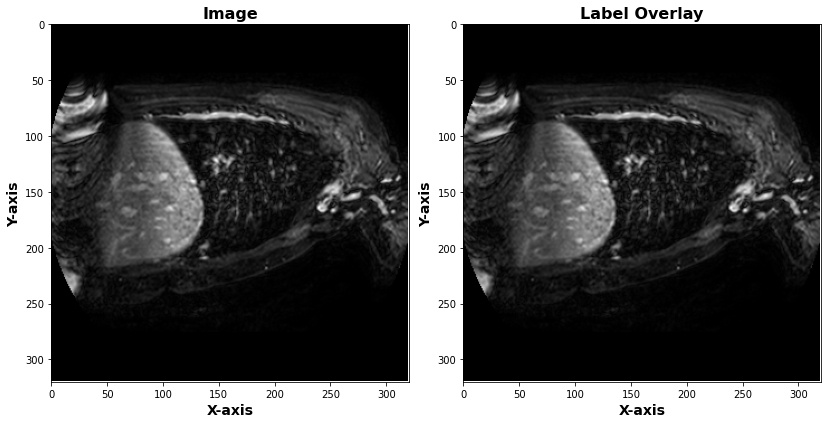

In [13]:
# Set up a loop to generate frames for the animation
# fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)
def update(frame):
    axs[0].clear()
    axs[0].imshow(nib_img[:, :, frame], cmap='gray')
    axs[0].set_title('Image', fontsize=16, fontweight='bold')
    axs[0].set_xlabel('X-axis', fontsize=14, fontweight='bold')
    axs[0].set_ylabel('Y-axis', fontsize=14, fontweight='bold')
    axs[0].set_xlim([0, nib_img.shape[1]])
    axs[0].set_ylim([nib_img.shape[0], 0])

    axs[1].clear()
    axs[1].imshow(nib_img[:, :, frame], cmap='gray')
    axs[1].imshow(np.ma.masked_where(nib_lab[:, :, frame]==0, nib_lab[:, :, frame]), cmap='cool_r', alpha=0.5)
    axs[1].set_title('Label Overlay', fontsize=16, fontweight='bold')
    axs[1].set_xlabel('X-axis', fontsize=14, fontweight='bold')
    axs[1].set_ylabel('Y-axis', fontsize=14, fontweight='bold')
    axs[1].set_xlim([0, nib_img.shape[1]])
    axs[1].set_ylim([nib_img.shape[0], 0])

    plt.tight_layout()

# Generate the animation using FuncAnimation
ani = FuncAnimation(fig, update, frames=nib_img.shape[2], interval=50)

# Save the animation as a gif file
ani.save('./Figures/image_label_overlay_ex4.gif', writer='imagemagick')

# Display the animation
plt.show()